In [69]:
pip install shap

  Using cached shap-0.44.1-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (24 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached slicer-0.0.7-py3-none-any.whl.metadata (3.7 kB)
  Using cached numba-0.58.1-cp38-cp38-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.7 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached llvmlite-0.41.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.8 kB)
Using cached shap-0.44.1-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (538 kB)
Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)
Using cached numba-0.58.1-cp38-cp38-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.7 MB)
Using cached llvmlite-0.41.1-cp38-cp38-manylinux_2_17_x86_64.manylinux20

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix
)
import matplotlib.pyplot as plt
import pickle
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import shap

In [27]:
data = pd.read_csv(r"/home/asus/New_Project_Churn/DataCleaning /clean_train_data")

data

,Name,Age,Location,Email,Phone,Address,Segment,NPS,ChurnLabel,TotalPurchaseFrequency,TotalPurchaseValue,ProductList,Plan,numEmails,numCalls,numChats,AVGLatePayment,NumPaymentMethods,PageViews,TimeSpent(minutes),ActionCount,unique_pages,Logins,Rating,Comment,AVGOpenDays,AVGClickDays,Gender_Female,Gender_Male,TotalInteractionType_Call,TotalInteractionType_Call|Chat,TotalInteractionType_Call|Chat|Email,TotalInteractionType_Call|Email,TotalInteractionType_Chat,TotalInteractionType_Chat|Email,TotalInteractionType_Email,Frequency_Daily,Frequency_Monthly,Frequency_Weekly,customer_segment_at_risk,customer_segment_loyal,customer_segment_need_attention,customer_segment_premium,Timestamp_Year,Timestamp_Month,Timestamp_Day,Start_Date_Year,Start_Date_Month,Start_Date_Day,End_Date_Year,End_Date_Month,End_Date_Day,FirstInteractionDate_Year,FirstInteractionDate_Month,FirstInteractionDate_Day,LastInteractionDate_Year,LastInteractionDate_Month,LastInteractionDate_Day,most_recent_action_date_Year,most_recent_action_date_Month,most_recent_action_date_Day
0,Mark Barrett,31,3155.595000,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",1,3,1,38,3994.72,3994.720000,6,1,1,2,13.333333,3,49,15,24,13,19,1,I move baby go small big. Office institution s...,818.0,319.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2020,1,27,2020,6,8,2022,10,27,2019,9,26,2021,7,25,2022,11,7
1,Jeremy Welch,66,1477.077500,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",2,6,0,4,2844.35,2844.350000,12,10,5,4,3.333333,3,100,9,24,13,9,2,Wish what bag cut life. Statement might opport...,110.0,88.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2019,1,6,2021,7,21,2022,5,7,2019,1,12,2022,12,13,2022,12,5
2,Brandon Patel,36,1866.520000,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",1,3,0,14,1866.52,1866.520000,5,1,1,1,2.666667,3,1,97,12,7,19,4,Some Democrat guess but short. Whether behind ...,333.0,117.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2019,4,30,2019,10,5,2020,8,19,2019,10,9,2022,1,4,2022,11,2
3,Tina Martin,62,2473.600000,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",2,1,1,28,1378.64,1378.640000,15,18,17,24,26.333333,3,25,31,47,14,4,1,Yard feel never miss ask billion Congress. Fly...,159.0,423.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2020,3,3,2020,1,14,2022,3,27,2019,1,3,2022,11,10,2022,12,8
4,Christopher Rodriguez,68,3795.523750,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",2,3,0,39,2425.05,2425.050000,0,5,4,1,0.666667,3,77,51,30,12,12,3,Ten determine unit interview challenge stock. ...,193.0,96.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2019,4,5,2021,4,8,2022,11,9,2019,4,10,2022,12,19,2022,12,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12478,Catherine Lee,55,1196.560000,kgarcia@example.com,(977)150-1569x426,"836 Gonzalez Drive Apt. 334\nLake Kelly, RI 01667",0,8,0,14,1196.56,1196.560000,5,3,3,4,1.000000,3,70,57,6,6,22,2,Light appear fight lawyer where star.,126.0,443.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2022,1,27,2019,6,15,2021,6,29,2019,5,7,2022,10,9,2022,10,2
12479,Kimberly Johnson,29,710.570000,carrjennifer@example.org,485.014.7824x5235,3715 Wiggins Harbors Suite 139\nEast Gregorybo...,0,7,0,1,710.57,523.136667,8,0,1,2,2.000000,3,71,66,9,8,25,3,Yet very girl history. Thing late dream you re...,167.0,40.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2020,6,14,2022,12,10,2022,12,28,2019,12,11,2022,11,5,2022,11,10
12480,Lisa Rodgers,38,5154.420000,william37@example.com,951-489-9554,"56050 Steven Summit Suite 383\nJ

In [28]:
X = data.drop(columns='ChurnLabel')
y = data['ChurnLabel']

In [33]:
# Drop text columns that can't be used directly
X_train = X_train.drop(columns=['Name', 'Email', 'Phone', 'Address', 'Comment'], errors='ignore')
X_test = X_test.drop(columns=['Name', 'Email', 'Phone', 'Address', 'Comment'], errors='ignore')


In [30]:
# splitting our data into 70% train set and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_pred, y_test)

In [35]:
round(score * 100, 2)

96.45

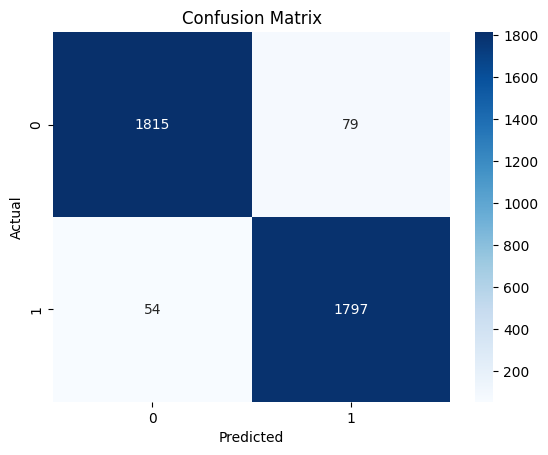

In [36]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, cmap='Blues', annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [37]:
{
    "precision_score": round(precision_score(y_pred, y_test) * 100, 2),
    "recall_score": round(recall_score(y_pred, y_test) * 100, 2)
}

{'precision_score': 95.79, 'recall_score': 97.08}

# Hyperparamater Tuning for Logistics Regression

In [42]:
from sklearn.model_selection import GridSearchCV
import pickle
import json

param_dist = {
    "penalty": ['l1', 'l2', 'elasticnet'],
    "solver": ['saga', 'sag', 'newton-cholesky'],
    "max_iter": [100, 200, 300]
}

model = LogisticRegression(random_state= 42, n_jobs = 1)
random_search = GridSearchCV(model, param_grid = param_dist, cv = 4)

random_search.fit(X_train, y_train)
best_param = random_search.best_params_
best_model = random_search.best_estimator_

print(best_param)

y_pred = best_model.predict(X_test)
score = accuracy_score(y_pred, y_test)


with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
    
schema = {'model_schema': X.columns.tolist()}

with open('feature_names.json', 'w') as f:
    json.dump(schema, f)

{'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cholesky'}


In [43]:
round(score * 100, 2)

96.66

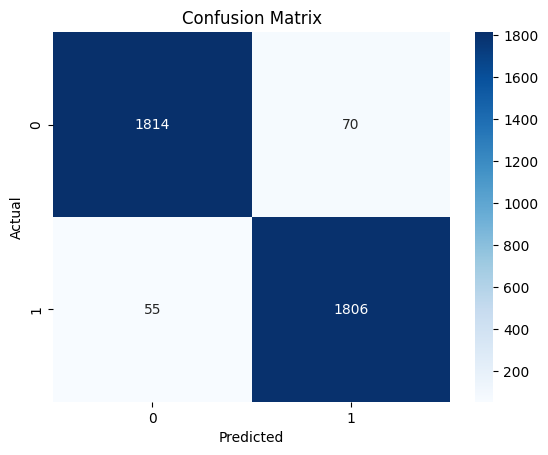

In [58]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, cmap='Blues', annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [60]:
with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [61]:
import os
print(os.getcwd())

/home/asus/New_Project_Churn/Model


In [62]:
import os
print(os.listdir())

['feature_names222.json', 'model.pkl', '__init__.py', 'model222.pkl', 'schema2222.json', 'model.ipynb']


In [ ]:
# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save the feature names (schema)
feature_names = X_train.columns.tolist()
print("Saving these feature names:", feature_names)  # <-- Double-check here!
with open('feature_names.json', 'w') as f:
    json.dump(feature_names, f)

Saving these feature names: ['Age', 'Location', 'Segment', 'NPS', 'TotalPurchaseFrequency', 'TotalPurchaseValue', 'ProductList', 'Plan', 'numEmails', 'numCalls', 'numChats', 'AVGLatePayment', 'NumPaymentMethods', 'PageViews', 'TimeSpent(minutes)', 'ActionCount', 'unique_pages', 'Logins', 'Rating', 'AVGOpenDays', 'AVGClickDays', 'Gender_Female', 'Gender_Male', 'TotalInteractionType_Call', 'TotalInteractionType_Call|Chat', 'TotalInteractionType_Call|Chat|Email', 'TotalInteractionType_Call|Email', 'TotalInteractionType_Chat', 'TotalInteractionType_Chat|Email', 'TotalInteractionType_Email', 'Frequency_Daily', 'Frequency_Monthly', 'Frequency_Weekly', 'customer_segment_at_risk', 'customer_segment_loyal', 'customer_segment_need_attention', 'customer_segment_premium', 'Timestamp_Year', 'Timestamp_Month', 'Timestamp_Day', 'Start_Date_Year', 'Start_Date_Month', 'Start_Date_Day', 'End_Date_Year', 'End_Date_Month', 'End_Date_Day', 'FirstInteractionDate_Year', 'FirstInteractionDate_Month', 'FirstIn

In [73]:
import numpy as np

coefs = best_model.coef_[0]  # For binary classification
feature_importance = sorted(zip(feature_names, coefs), key=lambda x: abs(x[1]), reverse=True)
top_features = feature_importance[:5]  # Top 5
print("Top contributing features (global):")
for feat, coef in top_features:
    print(f"{feat}: {coef:.4f}")

Top contributing features (global):
TotalInteractionType_Email: 0.3637
AVGLatePayment: 0.3308
customer_segment_premium: -0.2439
customer_segment_need_attention: 0.2308
TotalInteractionType_Call: -0.2270


In [72]:
# After you have X_train
feature_types = X_train.dtypes.apply(lambda x: x.name).to_dict()
with open('feature_types.json', 'w') as f:
    json.dump(feature_types, f)

In [75]:
# Print top 10 features
print("Top 10 features by absolute coefficient value:")
for feat, coef in feature_importance[:10]:
    print(f"{feat}: {coef:.4f}")

Top 10 features by absolute coefficient value:
TotalInteractionType_Email: 0.3637
AVGLatePayment: 0.3308
customer_segment_premium: -0.2439
customer_segment_need_attention: 0.2308
TotalInteractionType_Call: -0.2270
customer_segment_at_risk: 0.2180
TotalInteractionType_Chat|Email: -0.1731
NPS: -0.1719
most_recent_action_date_Year: -0.1395
End_Date_Year: 0.1389
